# 📓 Notebook - Teori & Praktik Bab 10: Neural Networks dengan Keras

Bab ini membahas fondasi Jaringan Saraf Tiruan (Artificial Neural Networks - ANN).

Menggunakan library **TensorFlow** dan API tingkat tingginya, **Keras**, yang merupakan standar industri saat ini.

Topik bahasan:
1.  **Perceptron:** Bentuk paling sederhana dari ANN.
2.  **Image Classifier:** Membangun Multi-Layer Perceptron (MLP) untuk mengenali pakaian (Fashion MNIST).
3.  **Regression MLP:** Menggunakan Neural Network untuk memprediksi harga rumah.
4.  **Functional API:** Membangun arsitektur model yang kompleks (Wide & Deep).
5.  **Callbacks:** Teknik menyimpan model otomatis dan *Early Stopping*.

In [1]:
%pip install tensorflow

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached grpcio-1.76.0-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.13.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached ml_dtypes-0.5.4-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cac

In [2]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")

TensorFlow Version: 2.20.0
Keras Version: 3.13.0


## 1. Perceptron (The Beginning)

### Teori
Perceptron adalah arsitektur ANN paling sederhana, ditemukan tahun 1957. Ia terdiri dari satu lapisan *Threshold Logic Units* (TLU). 

Setiap koneksi input memiliki bobot ($w$). TLU menghitung jumlah bobot dari input ($z = w \cdot x + b$), lalu menerapkan *step function* (misalnya: jika $z > 0$ output 1, jika tidak 0).

Perceptron mirip dengan Logistic Regression, tetapi ia belajar dengan aturan yang sedikit berbeda. Scikit-Learn menyediakan kelas `Perceptron`.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
print(f"Prediksi untuk [2, 0.5]: {y_pred} (1 artinya Iris Setosa)")

# Catatan: Perceptron biasa tidak bisa menyelesaikan masalah XOR (non-linear).
# Untuk itu, kita butuh Multi-Layer Perceptron (MLP).

Prediksi untuk [2, 0.5]: [1] (1 artinya Iris Setosa)


## 2. Image Classifier dengan Sequential API

### Teori: MLP & Backpropagation
Multi-Layer Perceptron (MLP) terdiri dari:
1.  **Input Layer:** Menerima data.
2.  **Hidden Layers:** Satu atau lebih lapisan di tengah di mana setiap neuron terhubung ke semua neuron di lapisan sebelumnya. Menggunakan fungsi aktivasi (seperti **ReLU**) untuk menangkap pola non-linear.
3.  **Output Layer:** Lapisan terakhir untuk prediksi.

Kita akan menggunakan dataset **Fashion MNIST** (gambar 28x28 piksel dari 10 jenis pakaian).

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape Data Train: (55000, 28, 28)
Contoh Label: Coat


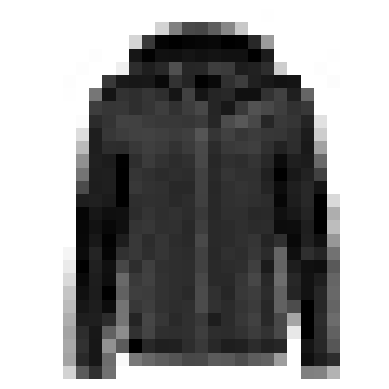

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print("Shape Data Train:", X_train.shape)
print("Contoh Label:", class_names[y_train[0]])

# Lihat satu gambar
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

### Membangun Model (Sequential API)

Menyusun lapisan seperti menumpuk kue:
1.  `Flatten`: Mengubah array 2D (28x28) menjadi 1D (784).
2.  `Dense` (Hidden): 300 neuron, aktivasi **ReLU**.
3.  `Dense` (Hidden): 100 neuron, aktivasi **ReLU**.
4.  `Dense` (Output): 10 neuron (karena ada 10 kelas), aktivasi **Softmax** (untuk probabilitas).

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

### Compile & Train Model

Sebelum melatih, kita harus menentukan:
* **Loss Function:** `sparse_categorical_crossentropy` (karena labelnya integer, bukan one-hot vector).
* **Optimizer:** `sgd` (Stochastic Gradient Descent).
* **Metrics:** `accuracy`.

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7572 - loss: 0.7385 - val_accuracy: 0.8222 - val_loss: 0.5293
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8273 - loss: 0.4920 - val_accuracy: 0.8408 - val_loss: 0.4638
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8431 - loss: 0.4458 - val_accuracy: 0.8514 - val_loss: 0.4297
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8525 - loss: 0.4179 - val_accuracy: 0.8570 - val_loss: 0.4082
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8594 - loss: 0.3978 - val_accuracy: 0.8628 - val_loss: 0.3929
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8651 - loss: 0.3818 - val_accuracy: 0.8654 - val_loss: 0.3815
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8694 - loss: 0.3685 - val_accuracy: 0.8688 - val_loss: 0.3710
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8737 - loss: 0.3569 - 

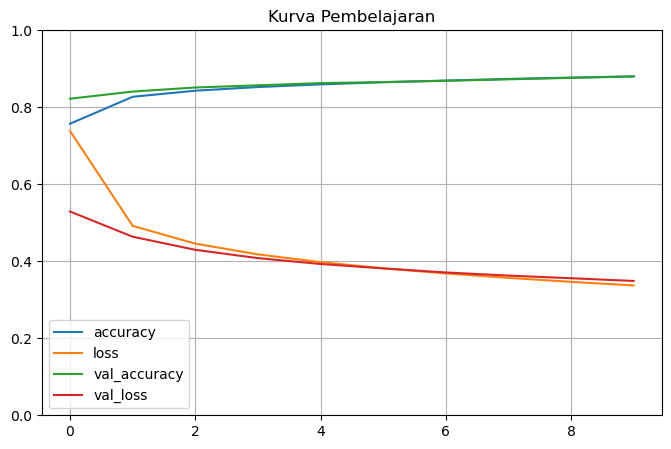

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Kurva Pembelajaran")
plt.show()

### Evaluasi & Prediksi

In [ ]:
model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=1)

print("Prediksi:", np.array(class_names)[y_pred])
print("Asli    :", np.array(class_names)[y_test[:3]])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8600 - loss: 0.3904
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Prediksi: ['Ankle boot' 'Pullover' 'Trouser']
Asli    : ['Ankle boot' 'Pullover' 'Trouser']


## 3. Regression MLP

### Teori
Untuk regresi (memprediksi angka kontinu, misal harga rumah), perbedaannya adalah:
1.  **Output Layer:** Biasanya hanya 1 neuron (untuk 1 nilai prediksi).
2.  **Aktivasi Output:** Biasanya **None** (tanpa aktivasi) agar bisa memprediksi nilai berapa pun.
3.  **Loss:** Mean Squared Error (`mse`).

Kita gunakan **California Housing Dataset**.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model_reg = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model_reg.compile(loss="mean_squared_error", optimizer="sgd")
history = model_reg.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

mse_test = model_reg.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model_reg.predict(X_new)
print("Prediksi Harga:", y_pred)

Epoch 1/10


c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7468 - val_loss: 0.7583
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4725 - val_loss: 0.5069
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4338 - val_loss: 0.5530
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4191 - val_loss: 0.9762
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4060 - val_loss: 0.4197
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4059 - val_loss: 2.6664
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3993 - val_loss: 4.3107
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4432 - val_loss: 10.4644
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4341 - val_loss: 10.6045
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4547 - val_loss: 0.3803
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3863
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Prediksi Harga: [[0.7139815]
 [1.7752504]
 [3.7289858]

## 4. Functional API (Untuk Model Kompleks)

### Teori: Wide & Deep Neural Network
Sequential API itu mudah, tapi terbatas (satu input, satu output, tumpukan linear). Bagaimana jika kita ingin membuat arsitektur **Wide & Deep**? 

Di arsitektur ini, sebagian input melewati hidden layer (Deep path), tapi sebagian input lain langsung terhubung ke output (Wide/Short path). Ini membantu model mempelajari pola sederhana dan pola kompleks sekaligus.

Kita menggunakan **Functional API** Keras untuk menghubungkan layer secara fleksibel.

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])

hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model_wide = keras.models.Model(inputs=[input_], outputs=[output])

model_wide.compile(loss="mse", optimizer="sgd")
# model_wide.fit(...) # Proses training sama seperti Sequential
model_wide.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 30)        │        270 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 30)        │        930 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ input_layer_2[0]… │
│ (Concatenate)       │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Callbacks (Checkpoint & Early Stopping)

### Teori
Training Deep Learning bisa memakan waktu berjam-jam. Apa yang terjadi jika komputer mati di tengah jalan? Atau jika model mulai *overfitting* setelah epoch ke-50?

Kita gunakan **Callbacks**:
1.  **ModelCheckpoint:** Menyimpan model secara berkala (misalnya: simpan hanya model terbaik).
2.  **EarlyStopping:** Menghentikan training otomatis jika validasi error tidak turun lagi dalam beberapa epoch (patience).

In [ ]:
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

model = keras.models.load_model("my_keras_model.keras") 
mse_test = model.evaluate(X_test, y_test)
print("MSE Model Terbaik:", mse_test)

Epoch 1/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9552 - val_loss: 1.3295
Epoch 2/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8234 - val_loss: 0.7741
Epoch 3/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6953 - val_loss: 0.6367
Epoch 4/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6273 - val_loss: 0.5867
Epoch 5/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5833 - val_loss: 0.5540
Epoch 6/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5507 - val_loss: 0.5254
Epoch 7/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5246 - val_loss: 0.4997
Epoch 8/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5031 - val_loss: 0.4777
Epoch 9/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4853 - val_loss: 0.4595
Epoch 10/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4705 - val_loss: 0.4448
Epoch 11/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4583 - val_loss: 0.4333
Epoch 12/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

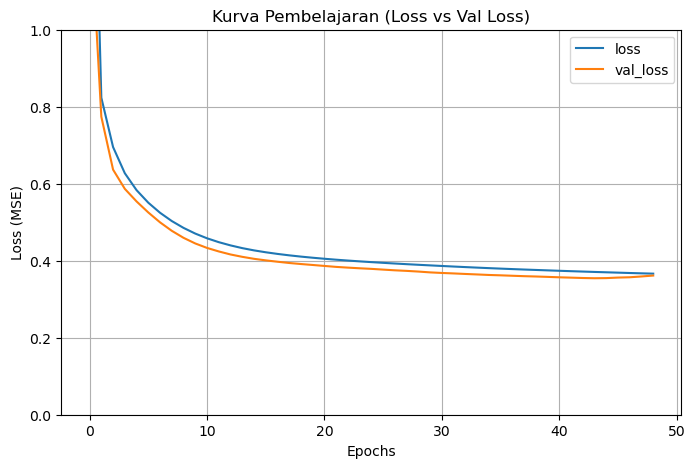

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Kurva Pembelajaran (Loss vs Val Loss)")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.show()

## Kesimpulan Bab 10

1.  **Perceptron** adalah unit dasar, tetapi **MLP** (dengan hidden layers) dibutuhkan untuk masalah kompleks.
2.  **Keras Sequential API** sangat mudah digunakan untuk membuat tumpukan layer sederhana.
3.  **Keras Functional API** memberikan fleksibilitas untuk arsitektur kompleks (seperti Wide & Deep).
4.  Selalu gunakan **Scaling** (StandardScaler) sebelum memasukkan data ke Neural Network.
5.  Gunakan **Callbacks** untuk menyimpan model terbaik dan menghemat waktu training.